# 4. '타이타닉' 생존자 예측

타이타닉호처럼 침몰을 앞둔 여객선의 생존 확률을 어떻게 예측할 수 있을까?

 노약자와 여성을 먼저 구출한다면 노인과 아이, 여성의 생존율이 높을 것이다. 좌석 등급을 기준으로 한다면, 3등석보다는 1등석 승객의 생존율이 높을 것이라 추측할 수 있다.
 
 
 영화에서도 3등석 표를 가지고 승선한 남자 주인공 잭(Jack)은 죽고, 귀족 가문의 딸로 1등석에 승선한 여자 주인공 로즈(Rose)는 결국 살아남았다. 이 밖에도 동반 가족 여부, 여행사 등 다양한 기준을 통해 데이터 분석 및 생존 예측이 가능하다.


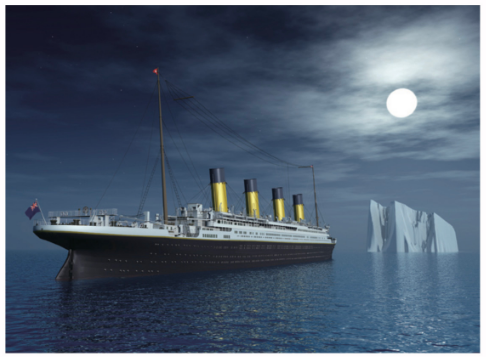

- 머신러닝 모델 중 의사결정 트리와 랜덤 포레스트에 대해 이해한다.

- 여러 가지 데이터 전처리 방법을 이해하고 인공지능 학습에 맞게 처리한다. 
- 모델 제작을 통해 의사결정 트리와 랜덤 포레스트를 비교 분석한다.


**<해결 모델은?>**

인공지능 모델을 제작하기 위해서는 그에 적합한 데이터를 사용해야 하는데, 우리 주변에 있는 데이터는 목적에 잘 맞지 않아 **전처리(수집한 데이터를 정제하고 용도에 맞게 가공하는 작업)**과정이 필요하다. 

이 Unit에서는 여러 가지 데이터 전처리 방법을 살펴보고, 성별, 나이, 좌석 등급 등 분기가 확실한 데이터 학습에 특화된

**의사결정 트리**와 **랜덤 포레스트** 알고리즘으로 인공지능 모델을 제작하고 서로 비교해 본다.

# [개념] 인공지능 알고리즘

지도 학습 모델 중 분류를 수행하기 위한 대표적인 알고리즘으로는 로지스틱 회귀(Logistic
Regression)를 비롯해 의사결정 트리(Decision Tree), 랜덤 포레스트(Random Forest), 서포트 벡터 머신(SVM; Support Vector Machine), k-최근접 이웃(kNN; k-Nearest Neighbor) 등이 있다. 그중에서도 기준이 다소 명확해 보이는 데이터에 많이 쓰이는 의사결정 트리와 랜덤 포레스트 알고리즘에 대하여 알아보자.

## 의사 결정 트리(Decision Tree)란?

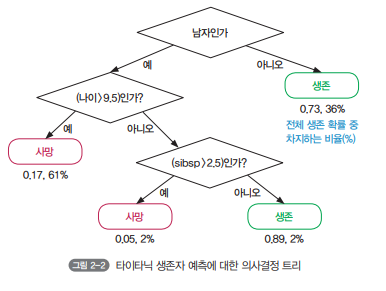


의사결정 트리는 데이터의 패턴을 학습한 후 트리(Tree) 형태로 규칙을 나열한 것이다. 비가 오는
지 맑은지 또는 유아인지, 노인인지 등 분기를 스스로 찾아내 해결하는 것과 같다.

분류를 수행하기 위한 알고리즘 
데이터의 패턴을 학습한 후 트리(Tree) 형태로 규칙을 나열. 분기를 스스로 찾아내 학습
나무를 거꾸로 세운 것과 같은 모양이고 하향식으로 if-else와 같이 조건을 예/아니오 로 분류함. 
이해하기 쉽고 직관적으로 데이터 구조를 파악할 수 있다. 키가 작고 가지가 없는 의사결정 트리 모델이 최적이고 연산 속도가 빠른 장점이 있지만 가지가 너무 많아지는 ‘과대 적합’문제와 가지가 한 쪽으로 너무 많은 ‘높은 분산’형태이면 데이터에 조그마한 변화가 와도 트리 전체 구조와 모델 예측에 커다란 변화를 주는 단점이 있다.


## 랜덤 포레스트(Random Forest)란?

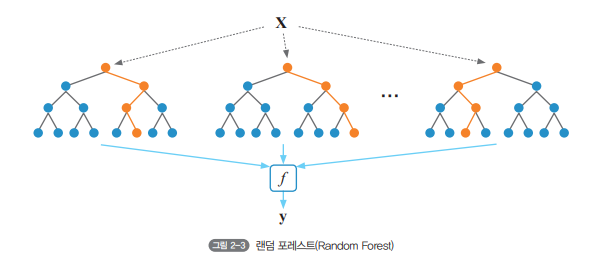

이러한 의사결정 트리의 단점을 보완한 알고리즘이 랜덤 포레스트(Random Forest)이다. [그림 
2-3]처럼 의사결정 트리가 여러 개 모여 숲(Forest)을 이룬 것으로, 여러 개의 의사결정 트리 결과 
예측 값 중 가장 많이 나온 값을 최종 결과로 본다.
서로 다른(또는 같은) 여러 머신러닝 알고리즘이 결합된 것을 앙상블(Ensemble)이라고 하는데, 랜
덤 포레스트는 새로운 알고리즘이 아니라 여러 개의 의사결정 트리가 결합된 앙상블의 한 예이다. 
과대 적합과 높은 분산 등 의사결정 트리의 단점을 해결하기 위한 모델이지만 데이터가 적을 경우
에는 다수의 트리를 만들기 어렵기 때문에 응용하기 쉽지 않다

# [실습]

## 데이터 불러오고 '결측치' 확인하기

타이타닉 승객 정보 데이터는 널리 알려진 데이터로, 
캐글 등 국내외 여러 데이터 사이트에서 쉽게 얻을 수 있다. 

캐글(kaggle) 에서 
‘Titanic’을 검색해 받은 데이터를 불러오자.
 
불러온 csv 파일을
df_titanic 변수에 저장한 후 
head()를 통해 데이터를 확인해보자.
(기본값 : 맨 앞 5개 데이터)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#타이타닉 승객 데이터 불러오기
url = 'https://drive.google.com/uc?export=download&id=1HgtDFM9SzxviOCYrSkRcxw2QlOMgxlgF'
df_titanic = pd.read_csv(url)
df_titanic.head() 
# head()의 기본값 : 괄호 안에 숫자를 입력하지 않을 경우, 맨 앞 5개 데이터가 보인다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


앞에서 실습 한 데이터들과 달리, 
타이타닉 승객 데이터는 중간에 비어있는 값도 많고 형태도 제각각으로 정리되지 않아서 인공지능 모델을 학습시키기 어려운 데이터이다. 

우리가 접하는 데이터는 대부분 이러한 타이타닉 승객 데이터처럼 많은 처리가 필요한 데이터들이다. 

데이터를 불러왔을 때 일부 데이터의 값이 존재하지 않는 경우가 있다. 이러한 데이터를 ‘결측치’ 라고 한다.

isnull(  ) 함수를 이용하면 결측치를 확인할 수 있고 sum(  ) 함수로 속성마다 결측치가 몇 개 있는지 알 수 있다.


In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 데이터 전처리  I: 결측치 처리하기

- Embarked(승선 항구)속성에 결측치가 2개 밖에 없으므로 dropna(  ) 함수를 이용해 결측치를 제거하면 된다. 

- dropna() 함수의 파라미터를 살펴보면 subset는 기준 속성을 뜻하고, axis는 0이면 NaN 값이 포함된 row(행)를 제거, 1이면 column(열)을 제거한다. 

- inplace는 갱신 여부이며 True일 경우 NaN 값을 제거하고 결과를 다시 df_titanic에 저장한다. 

- 결측치 제거 후 다시 확인해 보면 Embarked 속성의 결측치 데이터 2개가 없는 것을 확인할 수 있다.


In [ ]:
#Embarked 결측치 제거
df_titanic.dropna(subset=['Embarked'], axis=0, inplace=True)

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

- Age 속성의 177개 결측치를 평균 나이로 대체하기 위해 평균 나이를 구해 int()로 정수화

- df_titanic[‘Age’]로 나이 데이터만 출력하면 888번 승객의 나이가 NaN으로 표시가 된다.  이미 구한 평균값으로 채워 넣기 위해 fillna() 함수를 사용하고 inplace=True를 해 데이터를 갱신한다.
- isnull(). sum() 코드를 한 번 더 실행시키면 Age 속성 결측치가 모두 대체된 것을 확인할 수 있다.


In [ ]:
#나이 평균
age_mean = int(df_titanic['Age'].mean())
age_mean

29

In [ ]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [ ]:
#평균 나이로 결측치 대체
df_titanic['Age'].fillna(age_mean, inplace=True)

In [ ]:
df_titanic['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    29.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

In [ ]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 데이터 전처리 II: 특정 조건의 속성 추출 및 묶기

‘Name(이름)’ 속성은 타이타닉 생존자 예측을 하는데 관련이 없어 보이므로 삭제할 수 있으나, 이름 안에서도 ‘Title(호칭)’과 같이 의미 있는 데이터를 추출할 수 있으므로 삭제하지 않고 활용해보도록 하자.


- 특정한 조건의 문자를 간편하게 검색하거나 치환하는 방법을 ‘정규 표현식’이라고 한다. 
- 이러한 정규 표현식과 관련된 파이선 내장 함수를 이용하여 호칭을 추출해 보자.


In [ ]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


str.extract()는 특정 조건의 문자를 추출해 준다. 이름 속성의 데이터인 df_titanic[‘Name’]에서 특정 조건 문자를 추출하기 위해 정규 표현식을 사용한다. 

[A-Za-z]는 알파벳으로 이루어진 문자를 의미하고 +는 1번 이상 반복된 것을 의미한다. 또한 \.은 .(온점)을 특정한다. 

따라서 ([A-Za-z]+)\.은 ‘.(온점)과 그 앞에 있는 알파벳으로 이루어진 한 단어’를 의미하며 호칭 뒤에 .(온점)을 찍는 규칙을 통해 호칭만을 추출할 수 있게 하는 정규 표현식이다.


In [ ]:
#이름 대신 Title(호칭) 가져오기
df_titanic['Title'] = df_titanic['Name'].str.extract('([A-Za-z]+)\.')

Name(이름) 속성에서 호칭만을 추출해 Title 속성에 잘 저장되었는지 확인하기 위해 
판다스 모듈의 crosstab()함수를 사용한다. 

crosstab() 함수는 
범주형 변수를 기준으로 개수를 파악할 수 있다. 
개수를 파악할 속성인 ‘Title’과 기준인 성별 속성 ‘sex’를 넣는다. 


In [ ]:
#성별에 따른 호칭
pd.crosstab(df_titanic['Title'],df_titanic['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
#범주 묶기
df_titanic['Title'] = df_titanic['Title'].replace('Mlle', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace('Mme', 'Mrs')
df_titanic['Title'] = df_titanic['Title'].replace('Ms', 'Miss')
df_titanic['Title'] = df_titanic['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 
'Major', 'Rev', 'Sir'], 'Other')
df_titanic['Title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 889, dtype: object

## 데이터 전처리 III: 데이터 삭제 및 숫자로 변환

 같은 특성 혹은 부류로 묶인 범주형 데이터는 범주가 너무 많으면 인공지능 학습에 오히려 방해가 된다. 

특정 값을 나타내는 수치형 데이터와 다르게 범주형 데이터는 범주가 많지 않게 해 주는 것이 중요하다. 

- Mlle과 Ms는 Miss로, Mme는 Mrs 등으로 의미가 같은 호칭은 하나로 통일해 주고 
- 사회적 지위를 나타내는 호칭은 Other로 묶어 준다. 
- Title(호칭) 속성은 Other, Miss, Mrs, Mr, Master 다섯 가지 범주로 나누어 준다.


- 인공지능 모델 학습에 무의미하거나 다른 영향을 끼치는 속성 데이터는 삭제해야 한다. 
- 처음부터 끝까지 단순히 순서를 나타내는 PassengerID 속성과 Title 속성으로 대체된 Name 속성은 무의미하므로 삭제한다. 
- 결측치가 너무 많은 Cabin(선실) 속성과 다양한 방식으로 부여된 Ticket 속성은 의도하지 않거나 악영향을 끼칠 수 있어 drop(  ) 함수로 삭제한다. 의미 없는 속성을 제거하기 위해서는 columns(열)를 제거해야 하므로 axis=1로 설정한다.


In [ ]:
#인공지능 학습에 필요 없는 속성 제거
df_titanic.drop('PassengerId', axis=1, inplace=True)
df_titanic.drop('Name', axis=1, inplace=True)
df_titanic.drop('Ticket', axis=1, inplace=True)
df_titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Other
887,1,1,female,19.0,0,0,30.0000,S,Miss
888,0,3,female,29.0,1,2,23.4500,S,Miss
889,1,1,male,26.0,0,0,30.0000,C,Mr


- 문자 데이터를 학습하지 못하는 인공지능의 특성을 고려해 이를 숫자로 변환한다. 
- 성별 데이터는 남자는 1, 여자는 2와 같이 replace() 함수를 통해 범주마다 숫자로 대체해 주면 된다.
  
  



In [ ]:
#성별 데이터 숫자로 변환
df_titanic['Sex'] = df_titanic['Sex'].replace('male', 1)
df_titanic['Sex'] = df_titanic['Sex'].replace('female', 2)

In [ ]:
#승선 항구 데이터 숫자로 변환
df_titanic['Embarked'] = df_titanic['Embarked'].replace('S', 1)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('C', 2)
df_titanic['Embarked'] = df_titanic['Embarked'].replace('Q', 3)

In [ ]:
#호칭 데이터 숫자로 변환
df_titanic['Title'] = df_titanic['Title'].replace('Other', 0)
df_titanic['Title'] = df_titanic['Title'].replace('Miss', 1)
df_titanic['Title'] = df_titanic['Title'].replace('Mrs', 2)
df_titanic['Title'] = df_titanic['Title'].replace('Mr', 3)
df_titanic['Title'] = df_titanic['Title'].replace('Master', 4)


**모든 데이터 전처리 과정을 끝마치고 출력하면 Survived(생존 여부), Pclass(선실 등급), Sex(성별), Age(나이), SibSp(동반한 형제자매 혹은 배우자), Parch(동반한 부모 혹은 자식), Fare(운임), Embarked(승선 항구), Title(호칭) 등 9개의 속성으로 다듬어진 타이타닉 데이터가 나온다.**


In [ ]:
df_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,1,3
1,1,1,2,38.0,1,0,71.2833,2,2
2,1,3,2,26.0,0,0,7.9250,1,1
3,1,1,2,35.0,1,0,53.1000,1,2
4,0,3,1,35.0,0,0,8.0500,1,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,1,0
887,1,1,2,19.0,0,0,30.0000,1,1
888,0,3,2,29.0,1,2,23.4500,1,1
889,1,1,1,26.0,0,0,30.0000,2,3


## 의사결정 트리 모델 만들기

**인공지능 모델을 만들어 보자.**

- 먼저 독립 변수와 종속 변수로 데이터를 나누어야 한다. 
- 생존 여부를 예측하기 위해 Survived(생존 여부) 속성을 Y에 저장하고 df_titanic에서 Survived 속성만 제거해 종속 변수를 X에 저장한다. 
- 그 후 훈련 데이터와 테스트 데이터를 각각 7:3으로 나누어 
X_ train, X_test, Y_train, Y_test에 저장한다.
- 사이킷런(sklearn)에서 제공하는 의사결정 트리 알고리즘을 불러와 dt에 저장하고 X_train 데이터와 Y_train 데이터를 넣는다.


In [ ]:
#종속 변수(Y)와 독립 변수(X)
Y = df_titanic['Survived']
X = df_titanic.drop('Survived', axis=1)

In [ ]:
#훈련 데이터와 테스트 데이터
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((622, 8), (267, 8), (622,), (267,))

In [ ]:
#의사결정 트리 알고리즘 호출 및 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier() 
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

## 의사결정 트리 모델 평가하기

- predict() 함수를 이용해 테스트 데이터를 넣으면 예측 값이 나온다. 
- 이를 실제 값인 Y_test 값과 accuracy_score(  ) 함수로 비교하면 모델의 정확도가 나온다. 
- 우리가 만든 타이타닉 생존 여부 의사결정 트리 모델 정확도는 약 77.9% 정도임을 알 수 있다.


In [ ]:
#테스트 데이터 예측
dt_prediction = dt.predict(X_test)

In [ ]:
#예측 값과 실제 값을 비교해 정확도 구하기
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, dt_prediction)

0.7902621722846442

confusion_matrix(  )에 실제 값(Y_test)과 예측 값(df_prediction)을 넣으면 ‘혼동 행렬’이 출력
된다. 혼동 행렬(confusion matrix)은 머신러닝의 성능을 평가할 때 활용되는 지표로서, 오류 행렬
(error matrix)이라고도 한다. [그림 2-5]와 같이 실제 값이 어떤 범주로 분류되었는지 나타난다.

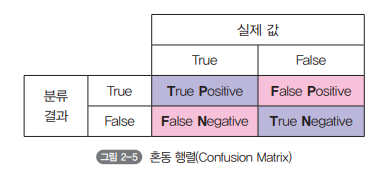

- 출력 결과의 상단을 확인해 보면, 사망자를 사망자라고 맞게 예측한 수가 129건, 생 존자를 생존자로 맞게 예측한 수가 79건으로 총 267명의 테스트 데이터 중 208명을 옳게 예측한 것을 알 수 있다. 
- 또한 classification_report() 함수를 통해 종합적인 정확도를 살펴보았을 때 사망자의 예측 정확도가 생존자의 예측 정확도보다 높다.



In [ ]:
#혼동 행렬과 평가 결과 확인
from sklearn.metrics import classification_report, confusion_matrix
print('오차 행렬\n', confusion_matrix(Y_test, dt_prediction))
print('\n평가 지표\n', classification_report(Y_test, dt_prediction))

오차 행렬
 [[132  28]
 [ 28  79]]

평가 지표
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       160
           1       0.74      0.74      0.74       107

    accuracy                           0.79       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.79      0.79      0.79       267



**예측 모델의 경우 각 속성의 가중치와 편향(절편)을 일차함수 형태로 나타내 모델을 확인할 수 있었다. 의사결정 트리의 경우는 일차함수 형태로 모델을 확인할 수 없으며 분기로 나누어진 트리 형태로 모델을 확인할 수 있다.**


- 사이킷런(sklearn)의 graphviz 모듈은 의사결정 트리 모델을 트리 형태로 시각화해 한눈에 보여 준다.
- export_graphviz() 함수를 사용하며, out_file에 이름을 넣으면 .dot 파일을 생성하며 class_names와 feature_names에 종속 변수와 독립 변수 속성을 넣어준다. 
- impurity는 Gini 계수 출력 여부를, filled는 class별 색 채우기 여부를 의미한다


In [ ]:
#결정 트리 시각화
from sklearn.tree import export_graphviz
import graphviz
dt_dot_data = export_graphviz(dt, out_file=None, 
class_names=["Not Survived", "Survived"], 
feature_names=X_train.columns, 
impurity=True, #gini 계수 출력
filled=True) #class별 color 채우기

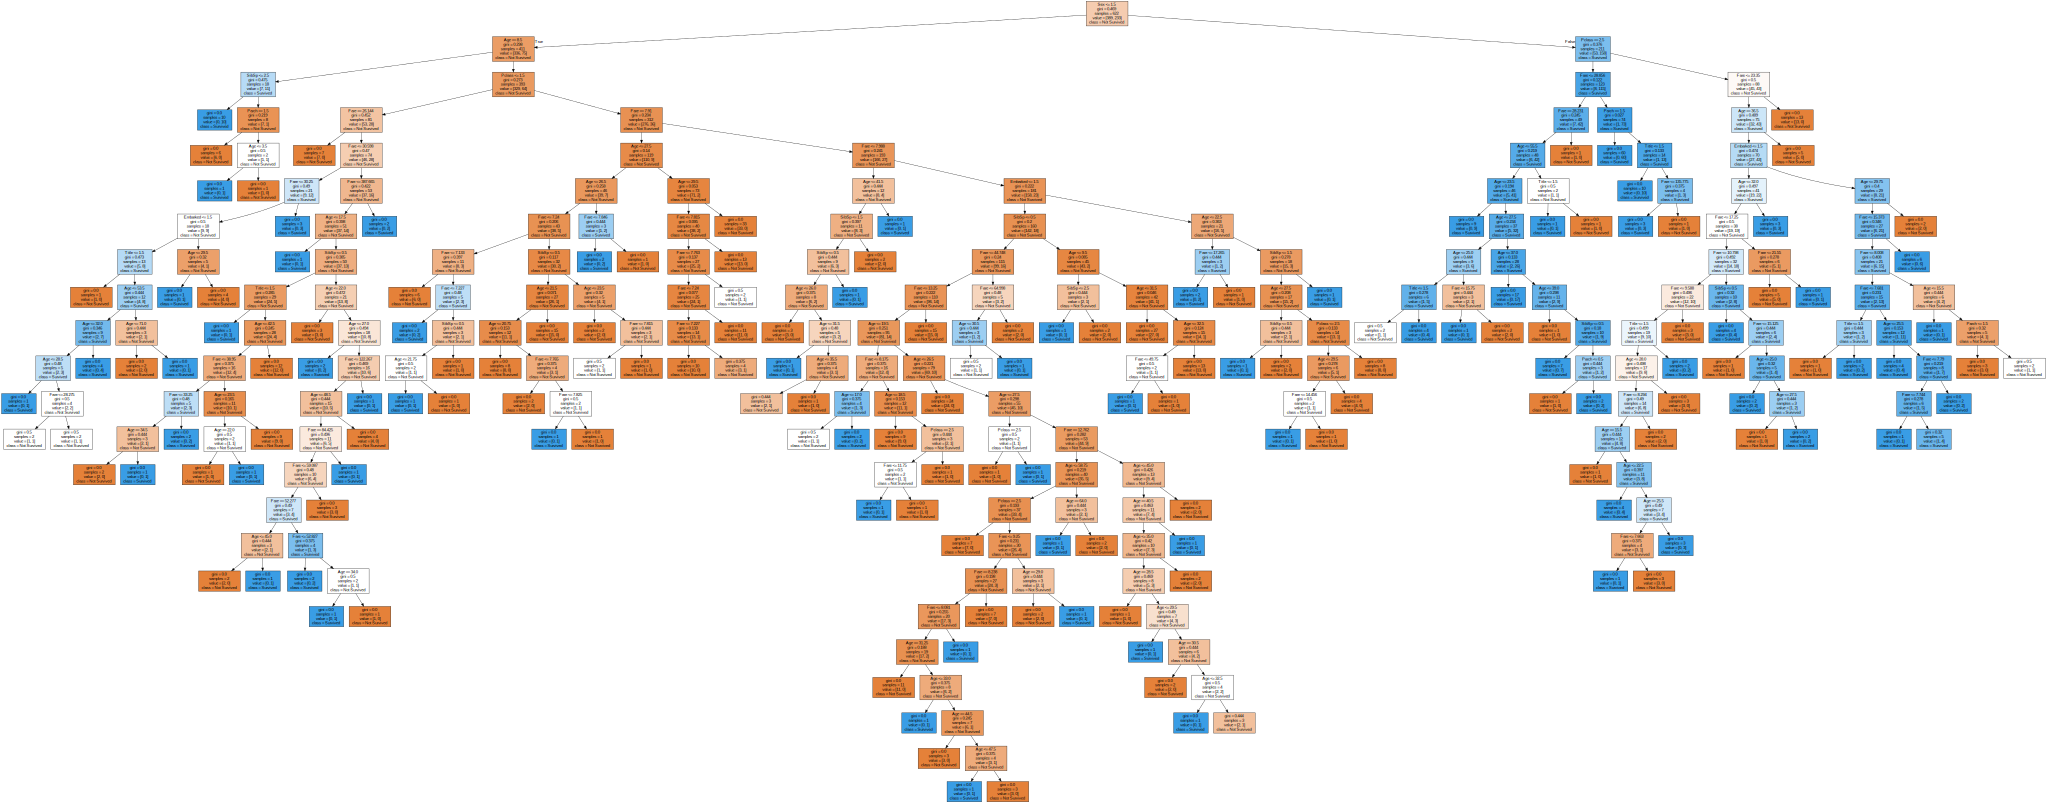

In [ ]:
graphviz.Source(dt_dot_data)

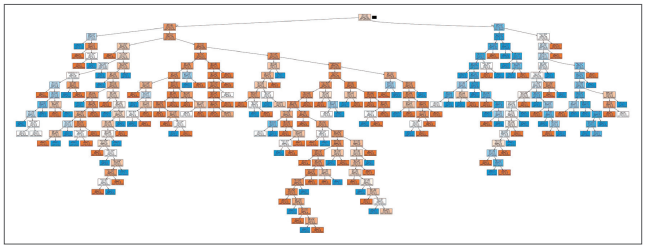

Gini 계수(더 알아보기 참고)는 0~1 사이의 수 중 0에 가까울수록 값을 골고루 나눔을 의미한다. 의사결정 트리에서는 데이터가 얼마나 잘 분산되었는지를 의미한다.

- 코드 실행 후 의사결정 트리 모델을 살펴보면 창 크기로 인해 불편함을 느낀다. 그래서 .dot 형식의 파일을 다룰 수 있게 도와주는 ‘pydotplus’ 모듈을 불러온 후 png 파일로 저장한다. 
- 화면 왼쪽 폴더 모양의 아이콘을 눌러주면 png 형식으로 저장된 의사결정 트리 모델 파일이 생성된다. 오른쪽 마우스를 클릭해서 그 파일을 다운로드하면 빈 공간에 새로 생성된 폴더와 같은 그림을 확인할 수 있다. 맨 첫 번째 분기는 Y(종속 변수) 속성인 생사 여부이다. 그 다음부터는 성별, 나이, 선실 등급 등 Gini 계수가 0에 가까운 속성을 골라 나누어지게 된다.


In [ ]:
import pydotplus

In [ ]:
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)

In [ ]:
dt_graph.write_png("Titanic_Tree.png")

True

## 랜덤 포레스트 모델로 학습하기

 의사결정 트리를 시각화한 결과를 자세히 살펴보면 왼쪽의 가지가 더 많고 층도 깊은 것을 알 수 있다. 의사결정 트리는 이러한 높은 분산 문제와 과대 적합 경향이 있어 이를 보완한 랜덤 포레스트(Random Forest) 알고리즘으로 머신러닝 모델을 만들어 보자.


사이킷런(sklearn) 모듈에서 제공하는 RandomForestClassifier(  ) 함수로 랜덤 포레스트 알고리즘을 불러온다.

 n_estimators는 트리 개수이며 최대 50개까지 가능하다. 
 
 max_features는 속성의 수를 입력하고 X_train과 Y_train 데이터로 학습을 시키면 된다.


In [ ]:
#랜덤 포레스트 모델 정의
from sklearn.ensemble import RandomForestClassifier

#트리 개수 최대 50개
rf = RandomForestClassifier(n_estimators=50, max_features=8, random_state=7)
rf.fit(X_train , Y_train)

RandomForestClassifier(max_features=8, n_estimators=50, random_state=7)

In [ ]:
#의사결정 트리 테스트
rf_prediction = rf.predict(X_test)

In [ ]:
#정확도 출력
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, rf_prediction)

0.846441947565543

랜덤 포레스트 알고리즘으로 학습한 결과 정확도가 84.6%로 의사결정 트리 모델보다 6.7% 상승했다. 아래 코드를 통해 세부 결과를 확인했을 때도 세부적으로 정밀도(precision)가 상승했음을 확인할 수 있다. 의사결정 트리 모델보다 랜덤 포레스트 모델이 사망자는 5% 상승한 87%의 정밀도로 예측하고 생존자 예측은 무려 10% 상승한 82%의 정밀도를 보여 준다.


In [ ]:
#랜덤 포레스트 평가
from sklearn.metrics import classification_report, confusion_matrix
rf_prediction = rf.predict(X_test)
print('오차 행렬\n', confusion_matrix(Y_test, rf_prediction))
print('\n평가 지표\n', classification_report(Y_test, rf_prediction))

오차 행렬
 [[141  19]
 [ 22  85]]

평가 지표
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       160
           1       0.82      0.79      0.81       107

    accuracy                           0.85       267
   macro avg       0.84      0.84      0.84       267
weighted avg       0.85      0.85      0.85       267



# [더알아보기] Gini 계수 이해하기

Gini 계수가 0에 가까울수록 데이터를 더 잘 분산할 수 있기 때문에, Gini 계수가 낮은 조건으로 분기를 결정해야 한다.
Gini 계수는 각 범주별 수를 전체 수로 나눈 값을 제곱하고 합을 구해 1에서 빼면 된다.


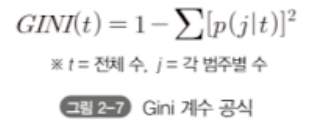

타이타닉 생존자 예측 모델 트리 중 가장 첫 번째 분기를 그림으로 확대해보자. 첫 번째 트리는 종속 변수의 속성이기 때문에 생존자와 사망자로 나뉜다.

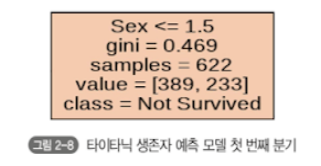

622명의 훈련 데이터에 ‘Survived’ 속성을 추가하고
Y_train의 값을 넣어 데이터(train_data)에 저장한다.

그 후 ‘Survived’ 속성으로 묶은 후 성별 갯수를 파악하면 사망자는 남녀 합쳐 389명, 생존자는 233명이다.


In [ ]:
#X_train 데이터와 Y_train 데이터 합치기
train_data = X_train
train_data['Survived'] = Y_train.values

In [ ]:
#생존 여부로 묶은 후 데이터 수 출력
train_data.groupby('Survived')['Sex'].count()

Survived
0    389
1    233
Name: Sex, dtype: int64

이후 X_train 데이터 중 가장 낮은 GIni 계수를 지닌 분기로 나누어지게 되어, 성별이 1.5보다 낮으면 (남성) 왼쪽으로, 높으면 (여성) 오른쪽으로 데이터가 나누어지게 된다.

성별 기준으로 훈련 데이터의 생존 여부를 나누면 남성의 경우 사망자가 335명, 생존자가 75명으로 두 번째 분기의 value와 일치한다. Gini 계수 또한 일치한다.

In [ ]:
#성별에 따른 생존 여부 데이터 수 출력
train_data.groupby('Sex')['Survived'].value_counts()

Sex  Survived
1    0           336
     1            75
2    1           158
     0            53
Name: Survived, dtype: int64

이런 방식으로 분기를 설정하고 데이터를 나누고 그 다음 분기가 0에 가까운 속성으로 나누는 것을 반복하면 Gini 계수가 0에 가까워지고 인공지능 모델이 완성된다.
